In [ ]:
#problem statement

'''We are internet service provider company. Time to time we face outages that cause outrage on social media. 
This afects the sakes and makes some clients drop.
Write a sript that willanalyze what people are saying about us and do a basic 
predictive model that can forecast our sales performance.

Use;
    1. Sentiment Analysis on the hashtags to understand user sentiment
    
    
    #ZUKU
    100
    
    Positive sentiments
    Negative sentiments
    
    Visualize the information on a graph
   '''
    

In [ ]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from tweepy import OAuthHandler

In [ ]:
consumer_key = 'Qi1xiPAKniZCX69S6ELwB3tgd'
consumer_secret = 'GX1ERJp3R6yRgy16r6w6MPiePDWtu17sEYFen3ZKc7BVwK7wQS'
access_token = '979348758075985920-ihiNHRzal35OuJ3jqklzhpjm0WjwLZa'
access_secret = 'dg2bJpSrGeq0aOzraBdQBEZ2tnFOGGgjBZPY5y6G0MQiB'

In [ ]:
auth = OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)

api = tweepy.API(auth)

Please enter keyword or hashtag to search: zuku
Please enter how many tweets to analyze: 100
RT @hemps_o: This photo explains how some people make poor decisions in life.

The lion chose sex over food while the zebra chose Entertain…
My block list is full of fake Zuku accounts
RT @MwendiaJnr: Kenyans will complain about bad services they get from Zuku and  Co-operative Bank but majority of them will not stop using…
What is wrong with Zuku customer care services. I paid for internet 2 days ago after they disconnected . Up to now… https://t.co/U8P9vNqRzF
RT @AbrahamBanadawa: Even Kenyans are tired of Zuku. @solomonking  I think we need a poll on which ISP to jump to
@Stan_Subru @kamonjomaina worse ukue unatumia zuku internet tu google.
- Zuku down countrywide once again!
- Hi Kenya yetu bana!🤣
RT @erycoyugi: What ever the #LGBTQ is doing behind close door,that’s their BS n they should keep it to themselves

Edwin Chiloba | Jackton…
Even Kenyans are tired of Zuku. @solomonking  I think we

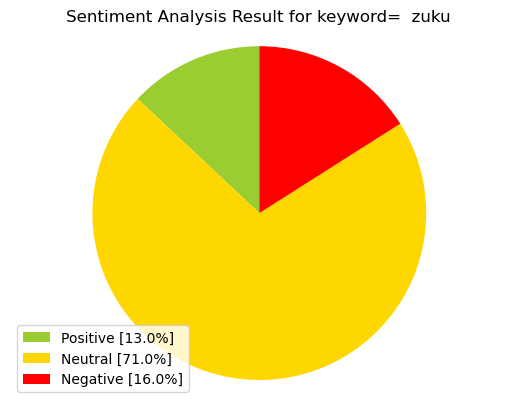

In [14]:
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))

tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)

positive  = 0
negative = 0
neutral = 0
polarity = 0

for tweet in tweets:
    #print(tweet.text)
    analysis = TextBlob(tweet.text)
    polarity += analysis.sentiment.polarity
    
    if (analysis.sentiment.polarity == 0):
        neutral += 1
        #print(analysis)
    
    elif (analysis.sentiment.polarity < 0.00):
        negative += 1
        print(analysis)
    
    elif (analysis.sentiment.polarity > 0.00):
        positive += 1
        #print(analysis)

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)

positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'gold','red']

patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(patches, labels, loc='best')
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()